### Artficial Neural Network for MNIST

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labesl:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


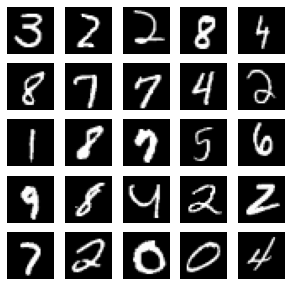

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()
unique, counts = np.unique(y_train,return_counts=True)
print("Train labels: ", dict(zip(unique,counts)))
print("Test labesl: ",dict(zip(unique,counts)))
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = x_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis("off")
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import pydot

(x_train,y_train),(x_test,y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size

x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255

batch_size = 128

model = Sequential()
model.add(Dense(units=2056,activation='relu',input_dim=input_size))
model.add(Dropout(0.25))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.summary()
# plot_model(model,show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2056)              1613960   
_________________________________________________________________
dropout (Dropout)            (None, 2056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2106368   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,730,578
Trainable params: 3,730,578
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=20,batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3802 - accuracy: 0.8820
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0984 - accuracy: 0.9692
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0700 - accuracy: 0.9787
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0454 - accuracy: 0.9850
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0462 - accuracy: 0.9850
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0424 - accuracy: 0.9865
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0328 - accuracy: 0.9901

In [4]:
_,acc = model.evaluate(x_test,y_test,batch_size=batch_size,
                      verbose=1)
print("\nThe test accuracy: %.1f%%" % (100.0*acc))
print(_)

79/79 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9814

The test accuracy: 98.1%
0.1366506814956665


### Convolutional Neural Network for MNIST

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,1])
x_test = np.reshape(x_test,[-1,image_size,image_size,1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size,image_size,1)
batch_size = 128

model = Sequential()
model.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3),input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,activation="relu",kernel_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = 10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          batch_size=batch_size)

469/469 [==============================] - 47s 100ms/step - loss: 0.3572 - accuracy: 0.8923 - val_loss: 0.0507 - val_accuracy: 0.9824


In [7]:
loss,acc = model.evaluate(x_test,y_test,batch_size=batch_size)

79/79 [==============================] - 3s 32ms/step - loss: 0.0507 - accuracy: 0.9824


In [8]:
print("Test Accuracy for the model is %.1f%%"%(100.0*acc))

Test Accuracy for the model is 98.2%


### Recurrent Neural Network for MNIST

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
num_labels = len(np.unique(y_train))

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size, image_size])
x_test = np.reshape(x_test,[-1,image_size, image_size])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
input_shape = (image_size,image_size)
batch_size = 128
units = 256
dropout = 0.25

In [9]:
model = Sequential()
model.add(LSTM(units=256,
                   dropout=dropout,
                   input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported